In [1]:
import os
import sys
from pathlib import Path
sys.path.append(os.path.join(Path().resolve(), '..'))
import numpy as np
import dezero.layers as L
import dezero.functions as F
from dezero.optimizers import Adam, SGD
from dezero import Variable, Model
from dezero import SeqDataLoader
import matplotlib.pyplot as plt
from utils import *
from data import SeqPTB
from tqdm.notebook import tqdm
import dezero


batch_size = 10
word_vecsize = 100
hidden_size = 100
time_size = 5
lr = 0.1
max_eopch = 100


corpus_size = 1000
dataset = SeqPTB(corpus_size = corpus_size)
dataloader = SeqDataLoader(dataset, batch_size)

seqlen = len(dataset)
vocab_size = dataset.vocab_size
corpus = dataset.corpus
w2i = dataset.word_to_id
i2w = dataset.id_to_word

In [2]:
class RNNLM(Model):
    def __init__(self, vocab_size, wordvec_size, hidden_dim=10):
        super().__init__()        
        self.t_embed = L.EmbedID(vocab_size, wordvec_size)
        self.t_rnn = L.RNN(hidden_size, in_size = wordvec_size)
        self.aff = L.Linear(vocab_size)               

    def forward(self, x):
        x = self.t_embed(x)
        x = self.t_rnn(x)
        x = self.aff(x)
        return x
            
    def reset_state(self):
        self.t_rnn.reset_state()



model = RNNLM(vocab_size, word_vecsize, hidden_size)
optimizer = Adam().setup(model)

if os.path.exists(os.path.join(os.path.join(Path().resolve(), '..'), 'ptb_rnn.npz')):
    model.load_weights(os.path.join(Path().resolve(), '..'), 'ptb_rnn.npz')


In [3]:
info = {}
best_loss = 1000

info['train_loss'] = []
info['train_perplexity'] = []
for epoch in range(max_eopch):
    model.reset_state()
    loss, count = 0, 0 
    
    for x, t in tqdm(dataloader, total=dataloader.data_size / dataloader.batch_size, leave=False):
        y = model(x)
        loss += F.softmax_cross_entropy(y, t)
        count += 1
        
        if count % time_size == 0 or count == seqlen:
            model.cleargrads()
            loss.backward()
            loss.unchain_backward()
            optimizer.update()
    avg_loss = float(loss.data) / count
    ppl = np.exp(avg_loss)
    info['train_loss'] += [avg_loss]
    info['train_perplexity'] += [ppl]
    print(f"{epoch+1} th epoch , loss {avg_loss}, perplexity {ppl}")

1 th epoch , loss 6.217560251096435, perplexity 501.47825728410936


2 th epoch , loss 5.716677374163519, perplexity 303.8935191708749


3 th epoch , loss 5.31513613062867, perplexity 203.39219915228435


4 th epoch , loss 4.923042466631358, perplexity 137.42007379846643


5 th epoch , loss 4.537370214599483, perplexity 93.44473710942236


6 th epoch , loss 4.175837282477007, perplexity 65.09431918326443


7 th epoch , loss 3.8445017025476154, perplexity 46.735390421758034


8 th epoch , loss 3.5396996887799834, perplexity 34.45656994238047


9 th epoch , loss 3.256885761460468, perplexity 25.968538859462857


10 th epoch , loss 2.992471112034919, perplexity 19.93488300584721


11 th epoch , loss 2.7441461997423278, perplexity 15.551330532290768


12 th epoch , loss 2.5107550133327066, perplexity 12.314223954829686


13 th epoch , loss 2.2918746541519313, perplexity 9.8934671368312


14 th epoch , loss 2.0874260386605847, perplexity 8.06413166467666


15 th epoch , loss 1.8973854353244035, perplexity 6.668436571157383


16 th epoch , loss 1.721708060756354, perplexity 5.594075329180211


17 th epoch , loss 1.5602846335196972, perplexity 4.760175957967662


18 th epoch , loss 1.4128509926860604, perplexity 4.107649605090374


19 th epoch , loss 1.2789482990603387, perplexity 3.592859124569558


20 th epoch , loss 1.1579325944235443, perplexity 3.1833452027289932


21 th epoch , loss 1.0489974954720542, perplexity 2.8547877453898622


22 th epoch , loss 0.9512251316068674, perplexity 2.588879435245523


23 th epoch , loss 0.8636529858408011, perplexity 2.3718090728454957


24 th epoch , loss 0.7853307187748503, perplexity 2.1931321307810006


25 th epoch , loss 0.7153503624401881, perplexity 2.0449030139732893


26 th epoch , loss 0.6528580463999775, perplexity 1.9210233645227313


27 th epoch , loss 0.5970582297225662, perplexity 1.8167664220552786


28 th epoch , loss 0.5472133615360302, perplexity 1.728429791754888


29 th epoch , loss 0.5026449395773982, perplexity 1.6530878109130285


30 th epoch , loss 0.4627387899655725, perplexity 1.5884183774028802


31 th epoch , loss 0.4269481069088167, perplexity 1.5325731297032907


32 th epoch , loss 0.3947906884777707, perplexity 1.4840735247204813


33 th epoch , loss 0.3658425645792356, perplexity 1.4417282456933151


34 th epoch , loss 0.339730903889427, perplexity 1.4045695754948877


35 th epoch , loss 0.3161276821759893, perplexity 1.371805399542874


36 th epoch , loss 0.2947446647313648, perplexity 1.342783454936244


37 th epoch , loss 0.2753291563469975, perplexity 1.3169640906221314


38 th epoch , loss 0.2576602578696864, perplexity 1.2938991518875367


39 th epoch , loss 0.24154524808863645, perplexity 1.2732150641622393


40 th epoch , loss 0.22681614394766286, perplexity 1.2545991810816424


41 th epoch , loss 0.21332640456638138, perplexity 1.237788605166753


42 th epoch , loss 0.20094793529907362, perplexity 1.2225611178873128


43 th epoch , loss 0.18956840585767648, perplexity 1.208727805223674


44 th epoch , loss 0.17908891349903683, perplexity 1.1961270912849453


45 th epoch , loss 0.16942204892913262, perplexity 1.1846200010362813


46 th epoch , loss 0.16049028011009392, perplexity 1.1740863610949843


47 th epoch , loss 0.15222466998623602, perplexity 1.1644218176800354


48 th epoch , loss 0.14456378059376893, perplexity 1.1555353933469732


49 th epoch , loss 0.13745279435245744, perplexity 1.1473475434099498


50 th epoch , loss 0.13084274494630546, perplexity 1.1397885297118096


51 th epoch , loss 0.12468983438932683, perplexity 1.1327970438852364


52 th epoch , loss 0.11895484597441612, perplexity 1.1263190593004984


53 th epoch , loss 0.11360259296004649, perplexity 1.1203068185894702


54 th epoch , loss 0.10860142416906675, perplexity 1.1147179621481147


55 th epoch , loss 0.10392277510489635, perplexity 1.109514769445413


56 th epoch , loss 0.09954078918473475, perplexity 1.1046635281457386


57 th epoch , loss 0.09543197719783121, perplexity 1.100133985292221


58 th epoch , loss 0.09157492586365415, perplexity 1.095898884786913


59 th epoch , loss 0.08795006825771993, perplexity 1.0919335985199536


60 th epoch , loss 0.0845395754655074, perplexity 1.088215910031036


61 th epoch , loss 0.08132728456330698, perplexity 1.0847258525047372


62 th epoch , loss 0.07829861306746673, perplexity 1.0814455442300208


63 th epoch , loss 0.075440398820985, perplexity 1.078358954337606


64 th epoch , loss 0.07274070908372038, perplexity 1.0754516459166306


65 th epoch , loss 0.07018867095605065, perplexity 1.0727105514882382


66 th epoch , loss 0.0677743435272901, perplexity 1.0701238008686544


67 th epoch , loss 0.06548861095169675, perplexity 1.067680577378585


68 th epoch , loss 0.06332307414236618, perplexity 1.065370977452074


69 th epoch , loss 0.06126998209066363, perplexity 1.063185916599224


70 th epoch , loss 0.05932214886915522, perplexity 1.0611170233338736


71 th epoch , loss 0.057472901227125214, perplexity 1.05915656842255


72 th epoch , loss 0.05571602082599892, perplexity 1.0572973906604661


73 th epoch , loss 0.054045697427697555, perplexity 1.0555328361884502


74 th epoch , loss 0.05245649098547617, perplexity 1.0538567088141795


75 th epoch , loss 0.05094330178422827, perplexity 1.0522632301441517


76 th epoch , loss 0.04950134335765592, perplexity 1.050747003742908


77 th epoch , loss 0.04812611152320545, perplexity 1.0493029761773327


78 th epoch , loss 0.04681336473452803, perplexity 1.04792641080358


79 th epoch , loss 0.045559093575672414, perplexity 1.0466128508822756


80 th epoch , loss 0.0443595109366482, perplexity 1.045358105012723


81 th epoch , loss 0.043211044779009146, perplexity 1.0441582357430101


82 th epoch , loss 0.04211034414161792, perplexity 1.0430095623961053


83 th epoch , loss 0.04105430225014452, perplexity 1.0419086819952288


84 th epoch , loss 0.04004006255042891, perplexity 1.0408524725617823


85 th epoch , loss 0.039065026918511755, perplexity 1.0398380989190514


86 th epoch , loss 0.03812685288623788, perplexity 1.0388630072912193


87 th epoch , loss 0.03722342482530843, perplexity 1.0379248931221092


88 th epoch , loss 0.03635283565899289, perplexity 1.0370216801754584


89 th epoch , loss 0.035513363720656346, perplexity 1.0361514948746777


90 th epoch , loss 0.03470345219578282, perplexity 1.0353126435809832


91 th epoch , loss 0.033921688455417626, perplexity 1.0345035899818786


92 th epoch , loss 0.03316678625262283, perplexity 1.0337229356389168


93 th epoch , loss 0.03243755454873951, perplexity 1.03296938689043


94 th epoch , loss 0.03173287749557787, perplexity 1.032241733477312


95 th epoch , loss 0.031051689658150118, perplexity 1.0315388223976014


96 th epoch , loss 0.03039297841551889, perplexity 1.0308595599215533


97 th epoch , loss 0.02975579749699477, perplexity 1.0302029251000986


98 th epoch , loss 0.029139278556194602, perplexity 1.0295679812314789


99 th epoch , loss 0.02854263517791449, perplexity 1.028953879531062


100 th epoch , loss 0.02796515004349538, perplexity 1.0283598455010494


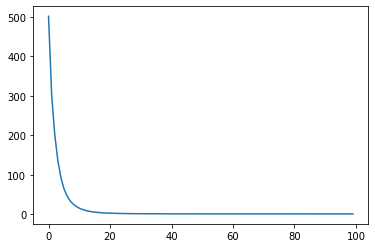

In [4]:
plt.plot(info['train_perplexity'])

モデルの正答率の確認

In [5]:
for x,y in dataloader:
    break

入力

In [6]:
[i2w[v] for v in x]

['aer',
 'of',
 '<unk>',
 '<eos>',
 'far',
 '<unk>',
 'virtually',
 'even',
 'of',
 'average']

予測値

In [7]:
[i2w[x] for x in np.argmax(model(x).data, axis=1)]

['banknote',
 'the',
 'inc.',
 'it',
 'higher',
 'more',
 'a',
 'though',
 'of',
 'maturity']

正解

In [8]:
[i2w[x] for x in y]

['banknote',
 'workers',
 '<unk>',
 'the',
 'higher',
 'more',
 'all',
 'though',
 'a',
 'maturity']